In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [74]:
import warnings
warnings.filterwarnings("ignore")

## Lets load in our data, we will start with HY and Manager data

In [75]:
data = pd.read_csv('Managers.csv')

In [76]:
data1 = pd.read_csv('HY_Agg.csv')

In [77]:
data.head()

,Date,Manager_A_Monthly_Return_Percent,Manager_B_Monthly_Return_Percent,Manager_C_Monthly_Return_Percent
0,01/31/2015,1.9610,1.58,2.088553
1,02/28/2015,-0.5723,-0.53,-0.896415
2,03/31/2015,0.3403,-0.14,-0.058587
3,04/30/2015,-0.4199,0.32,0.110233
4,05/31/2015,-0.5072,-0.12,0.244451


In [78]:
data1.head()

,Date,HY_Percent_Return,Agg
0,09/30/2019,0.317,-0.5325
1,08/30/2019,0.390,2.5913
2,07/31/2019,0.512,0.2201
3,06/28/2019,2.452,1.2556
4,05/31/2019,-1.271,1.7752


## Join the HY data and Manager data on the date (Prepping and cleaning data for linear regression)

In [79]:
newData = pd.merge(data, data1, on='Date', how='right') 

In [80]:
newData.head()

,Date,Manager_A_Monthly_Return_Percent,Manager_B_Monthly_Return_Percent,Manager_C_Monthly_Return_Percent,HY_Percent_Return,Agg
0,03/31/2015,0.3403,-0.14,-0.058587,-0.531,0.4644
1,04/30/2015,-0.4199,0.32,0.110233,1.199,-0.3588
2,06/30/2015,-1.3120,-0.58,-1.001936,-1.525,-1.0904
3,07/31/2015,0.8449,-0.32,-0.892478,-0.616,0.6951
4,08/31/2015,-0.5512,-0.62,-0.126473,-1.761,-0.1436


## Lets do some descriptive statistics on our variables

In [81]:
newData['Manager_A_Monthly_Return_Percent'].describe() # Manager A Returns

count    39.000000
mean      0.096279
std       0.890459
min      -2.573200
25%      -0.452150
50%       0.160500
75%       0.602600
max       2.105500
Name: Manager_A_Monthly_Return_Percent, dtype: float64

In [82]:
newData['Manager_B_Monthly_Return_Percent'].describe() # Manager B Returns

count    39.000000
mean      0.148974
std       0.684435
min      -1.430000
25%      -0.165000
50%       0.230000
75%       0.440000
max       2.100000
Name: Manager_B_Monthly_Return_Percent, dtype: float64

In [83]:
newData['Manager_C_Monthly_Return_Percent'].describe() # Manager C Returns

count    39.000000
mean      0.149886
std       0.593400
min      -1.509372
25%      -0.113573
50%       0.206835
75%       0.559835
max       1.422141
Name: Manager_C_Monthly_Return_Percent, dtype: float64

In [84]:
newData['HY_Percent_Return'].describe() # HY Return

count    57.000000
mean      0.489947
std       1.571018
min      -2.594000
25%      -0.394000
50%       0.512000
75%       1.153000
max       4.593000
Name: HY_Percent_Return, dtype: float64

## Linear Regression model 

Text(0.5, 1.0, 'Relationship between Manager A and HY')

<Figure size 1080x3240 with 0 Axes>

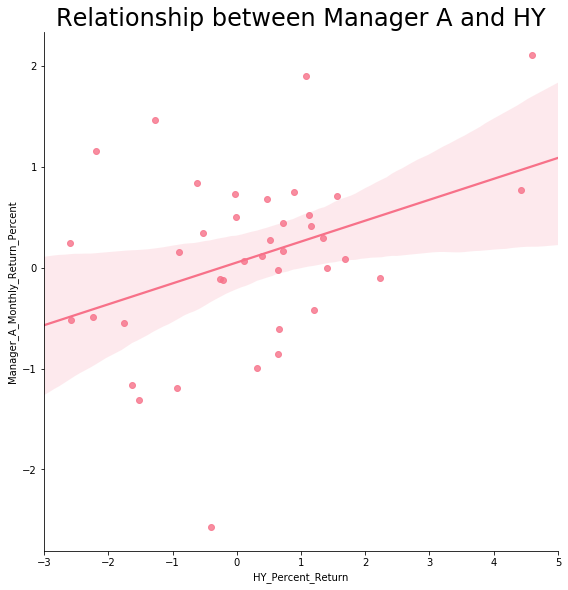

In [85]:
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('HY_Percent_Return', 'Manager_A_Monthly_Return_Percent', data = newData, height=8, fit_reg=True)
plt.title('Relationship between Manager A and HY', size=24)

Text(0.5, 1.0, 'Relationship between Manager B and HY')

<Figure size 1080x3240 with 0 Axes>

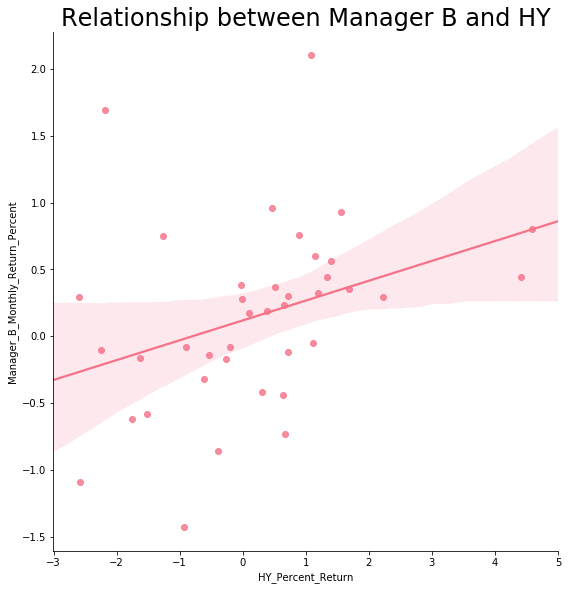

In [86]:
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('HY_Percent_Return', 'Manager_B_Monthly_Return_Percent', data = newData, height=8, fit_reg=True)
plt.title('Relationship between Manager B and HY', size=24)

Text(0.5, 1.0, 'Relationship between Manager C and HY')

<Figure size 1080x3240 with 0 Axes>

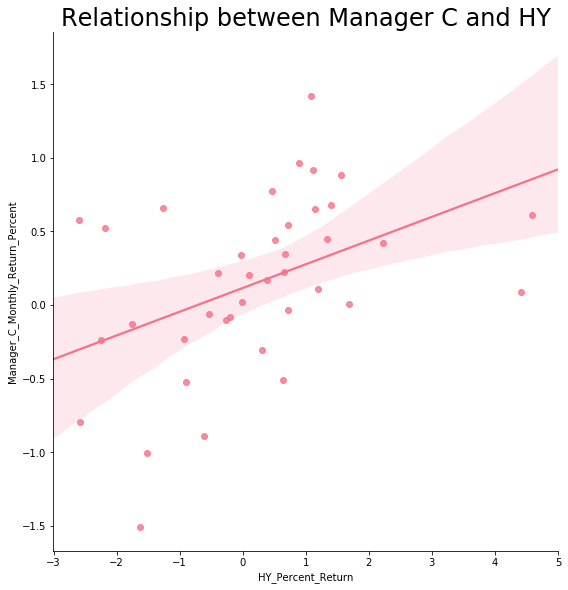

In [87]:
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('HY_Percent_Return', 'Manager_C_Monthly_Return_Percent', data = newData, height=8, fit_reg=True)
plt.title('Relationship between Manager C and HY', size=24)

# Correlation Matrix to show which managers have most correlated return amongst the HY Index

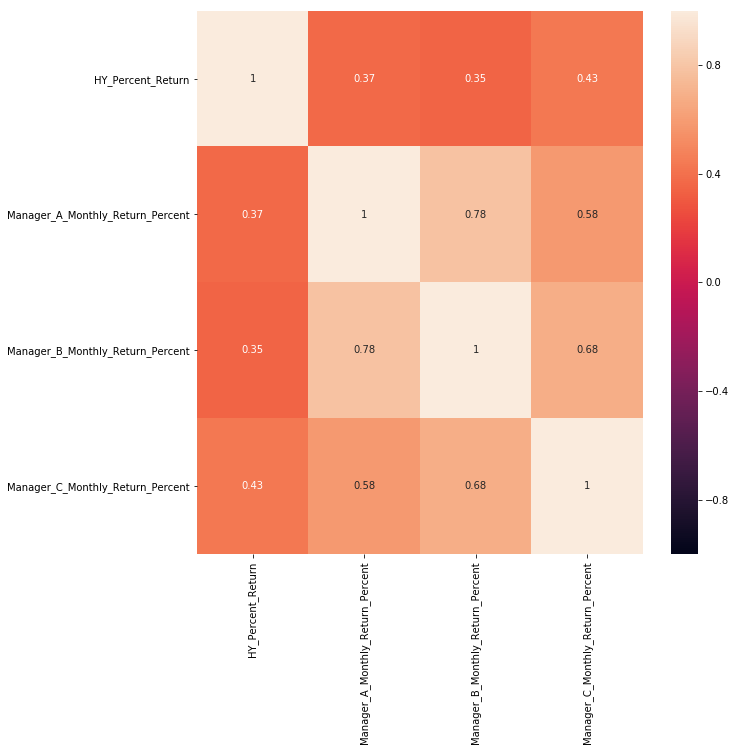

In [88]:
#Pairwise correlation between attributes
fig=plt.figure(figsize=(10, 10))
sns.heatmap(newData[['HY_Percent_Return', 'Manager_A_Monthly_Return_Percent', 'Manager_B_Monthly_Return_Percent', 'Manager_C_Monthly_Return_Percent' ]].corr(), vmin = -1, vmax=1, annot=True)
plt.show()